In [1]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x144 with 0 Axes>

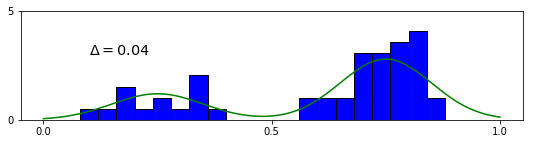

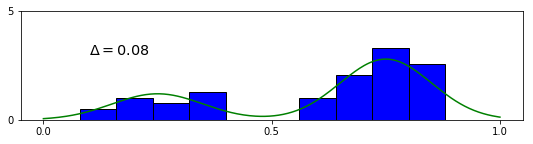

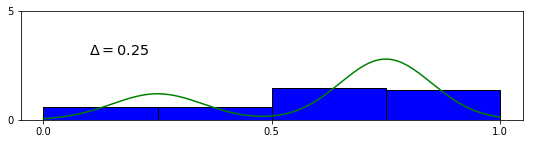

In [2]:
from scipy.stats import norm
plt.figure(figsize=(6,2))
tt1=norm.rvs(size=15, loc=0.25, scale=0.1)
tt2=norm.rvs(size=35, loc=0.75, scale=0.1)
tt = np.linspace(0, 1, 300)
tp = 0.3 * norm.pdf(tt, loc=0.25, scale=0.1) + 0.7 * norm.pdf(tt, loc=0.75, scale=0.1)
delt=[0.04,0.08,0.25]
for i,d in enumerate(delt):
    plt.figure(figsize=(9,2))
    plt.plot(tt,tp,'g')
    plt.hist(np.hstack([tt1,tt2]),bins=np.arange(0,1.01,d),density=True,facecolor='blue',edgecolor='black')
    plt.text(0.1, 3, '$\Delta=$%s' % d, fontsize='x-large')
    plt.xticks([0,0.5,1])
    plt.ylim([0,5])
    plt.yticks([0,5])
    plt.show()

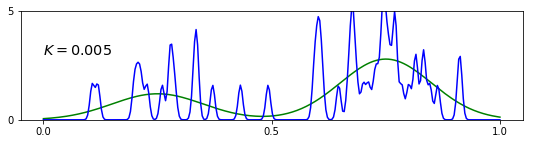

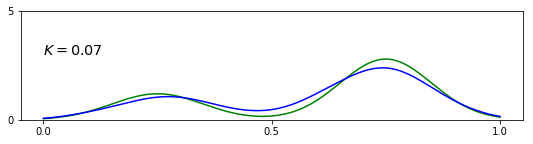

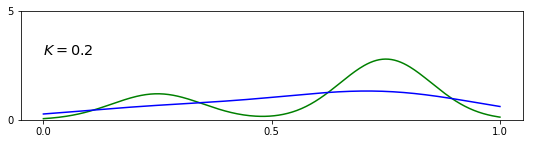

In [3]:
from scipy.stats import norm
tt1=norm.rvs(size=15, loc=0.25, scale=0.1)
tt2=norm.rvs(size=35, loc=0.75, scale=0.1)
tt3=np.hstack([tt1,tt2])
tt = np.linspace(0, 1, 300)
tp = 0.3 * norm.pdf(tt, loc=0.25, scale=0.1) + 0.7 * norm.pdf(tt, loc=0.75, scale=0.1)
hh=[0.005,0.07,0.2]
for i,d in enumerate(hh):
    plt.figure(figsize=(9,2))
    plt.plot(tt,tp,'g')
    tq = np.zeros_like(tp)
    for x in tt3:
        tq += norm.pdf(tt, loc=x, scale=d) /50
    plt.plot(tt,tq,color='b')
    plt.text(0, 3, '$K=$%s' % d, fontsize='x-large')
    plt.xticks([0,0.5,1])
    plt.ylim([0,5])
    plt.yticks([0,5])
    plt.show()

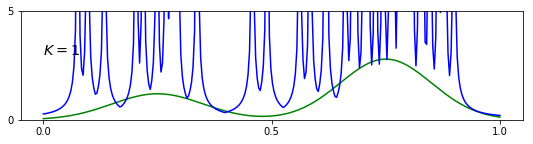

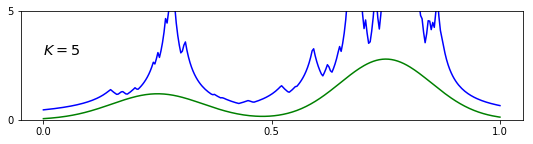

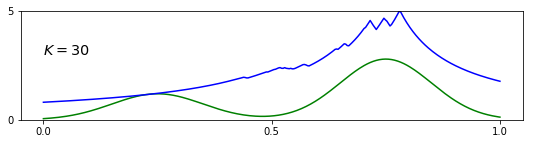

In [4]:
from scipy.stats import norm
tt1=norm.rvs(size=15, loc=0.25, scale=0.1)
tt2=norm.rvs(size=35, loc=0.75, scale=0.1)
tt3=np.hstack([tt1,tt2])
tt = np.linspace(0, 1, 300)
tp = 0.3 * norm.pdf(tt, loc=0.25, scale=0.1) + 0.7 * norm.pdf(tt, loc=0.75, scale=0.1)
kk=[1,5,30]
N=50
for i,k in enumerate(kk):
    plt.figure(figsize=(9,2))
    plt.plot(tt,tp,'g')
    tq = np.zeros_like(tp)
    for j,x in enumerate(tt):
        dd = np.abs(tt3 - x)
        dd.sort()
        tq[j] = kk[i] / (N*(dd[kk[i]-1]))
    plt.plot(tt,tq,color='b')
    plt.text(0, 3, '$K=$%s' % k, fontsize='x-large')
    plt.xticks([0,0.5,1])
    plt.ylim([0,5])
    plt.yticks([0,5])
    plt.show()

In [5]:
# #Linear Models for Regression

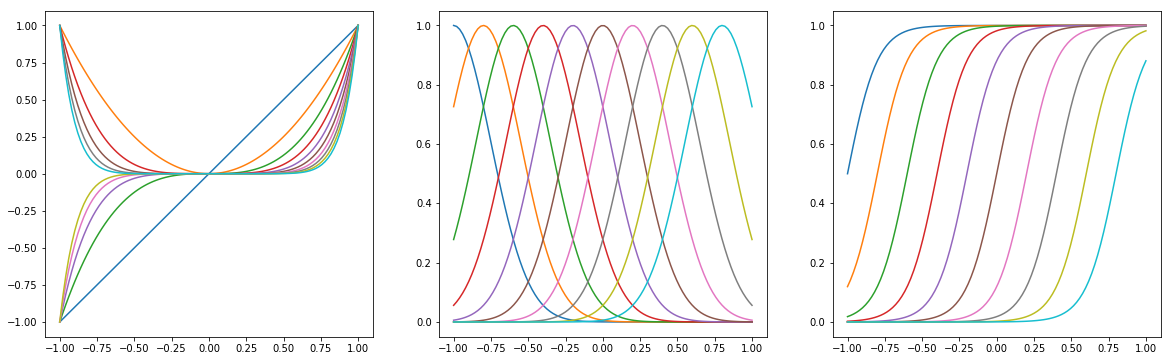

In [6]:
def poly(x,n):
    return x**n
def gaussain(x,u,s):
    return np.exp(-(x-u)**2/2/s**2)
def sigmoid(x,u,s):
    a=(x-u)/s
    return 1/(1+np.exp(-a))
plt.figure(figsize=(20,6 ))

for i in range(3):
    plt.subplot(1,3,i+1)
    x=np.linspace(-1,1,100)
    if i==0:
        for j in range(10):
            plt.plot(x,poly(x,j+1))
    if i==1:
        for j in range(10):
            plt.plot(x,gaussain(x,(j-5)/5,0.25))
    if i==2:
        for j in range(10):
            plt.plot(x,sigmoid(x,(j-5)/5,0.1))
plt.show()

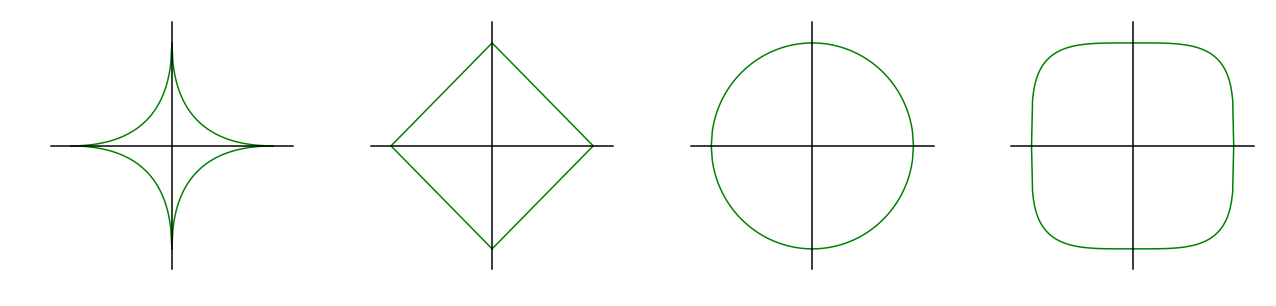

In [7]:
qq=[0.5,1,2,4]   
x=np.linspace(0,1,100)
y=[]
for i,q in enumerate(qq):
    y.append((1-x**q)**(1/q))
plt.figure(figsize=(22,5))
for j in range(4):
    plt.subplot(1,4,j+1)
    plt.axis('off')
    plt.plot(x,y[j],'g',
            x,-y[j],'g',
            -x,y[j],'g',
            -x,-y[j],'g')
    plt.plot([-1.2, 1.2], [0, 0], 'k')
    plt.plot([0, 0], [-1.2, 1.2], 'k')       
plt.show()

C:\Users\yilun\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


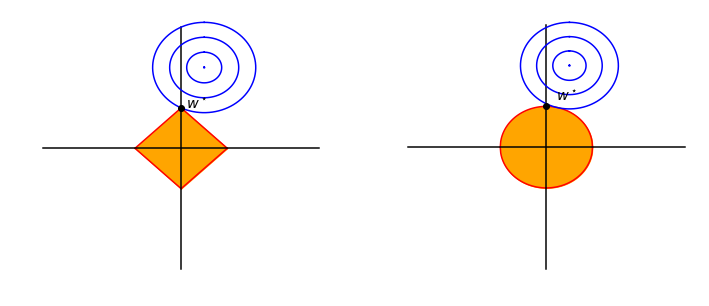

In [8]:
plt.figure(figsize=(12,5))
rr = [ np.sqrt(1.25),np.sqrt(4.25)-1]
tex=[[0.1,1],[0.2,1.15]]
for l in range(2):
    plt.subplot(1,2,l+1)
    plt.axis('off')
    j=l+1
    plt.plot(x,y[j],'r',
            x,-y[j],'r',
            -x,y[j],'r',
            -x,-y[j],'r')
    plt.plot([-3, 3], [0, 0], 'k')
    plt.plot([0, 0], [-3, 3], 'k')   
    plt.fill_between(x,-y[j],y[j],color='orange')
    plt.fill_between(-x,-y[j],y[j],color='orange')
    tt = np.linspace(0, 2 * np.pi, 100)
    rr = [ np.sqrt(1.25),np.sqrt(4.25)-1]
    for t in np.linspace(0.01,rr[l], 4):
        plt.plot(0.5 + t * np.sin(tt), 2 + t * np.cos(tt), 'b')
    texx=tex[l]
    plt.text(texx[0], texx[1], r'$w^\star$', fontsize='x-large')
plt.subplot(1,2,1)
plt.plot(0, 1, 'ko')
plt.subplot(1,2,2)
plt.plot(0.22,0.97, 1, 'ko')
plt.show()


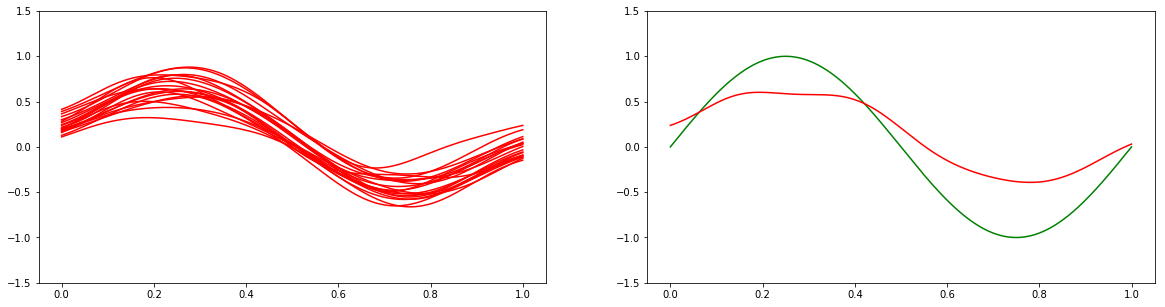

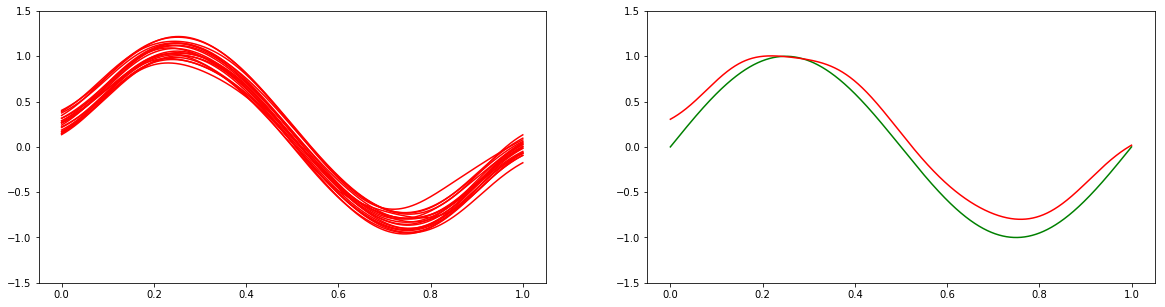

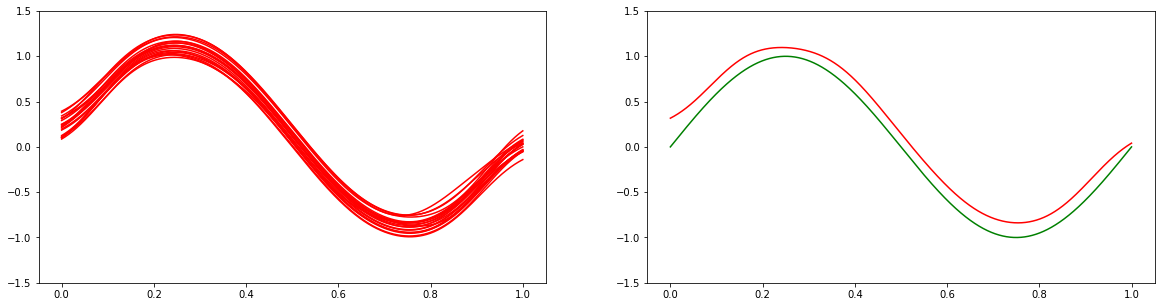

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
N=25
x_train=[]
y_train=[]
for a in [np.exp(2.6),np.exp(-0.31),np.exp(-2.4)]:
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    for i in range(100):
        x_train.append(np.random.rand(N))
        y_train.append(np.sin(2*np.pi*x_train[i])+np.random.uniform(0,0.25))        
        #clf = GaussianProcessRegressor(alpha=a)
        gauss_model = make_pipeline(GaussianFeatures(24),Ridge(alpha=a))
        x_train[i]=x_train[i].reshape(-1, 1) 
        y_train[i]=y_train[i].reshape(-1, 1) 
        gauss_model.fit(x_train[i], y_train[i])
        #clf.fit(x_train[i], y_train[i])
        x_test=np.linspace(0,1,10000)
        x_test=x_test.reshape(-1,1)
        y = gauss_model.predict(x_test)
        y_list=[]
        y_list.append(y)
        if i <20:
            plt.plot(x_test, y, color="r")
        plt.ylim(-1.5, 1.5)
    y_test=np.sin(2*np.pi*x_test)
    plt.subplot(1, 2, 2)
    plt.plot(x_test, y_test,color='g')
    plt.plot(x_test, np.asarray(y_list).mean(axis=0),color='r')
    plt.ylim(-1.5, 1.5)
    plt.show()


C:\Users\yilun\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


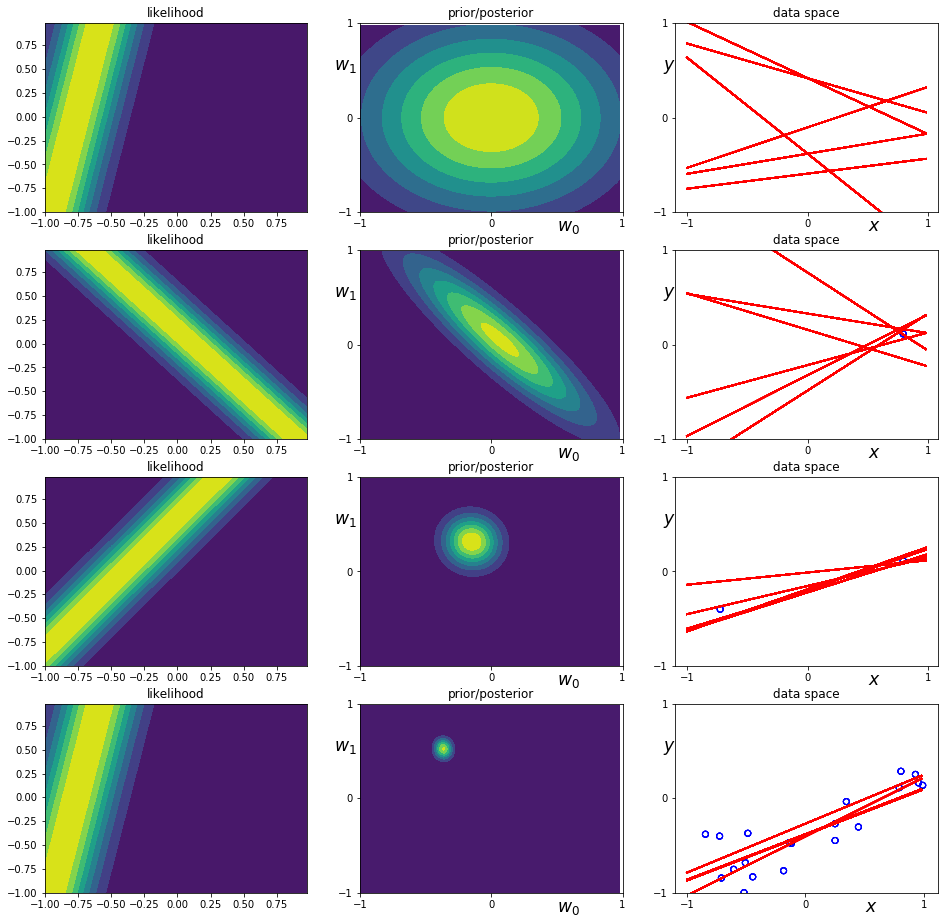

In [10]:
from scipy.stats import uniform, norm
from matplotlib.mlab import bivariate_normal
from scipy.stats import multivariate_normal
def f(xx,a0,a1):
    return a0 + a1 * xx
def lik(tt,x,y,xx,s):
    return 1 / np.sqrt(2*np.pi)/s*np.exp(-(tt-x-y*xx)**2/(2*s**2))
a0, a1 = -0.3, 0.5
bt = 25.0
s = np.sqrt(1.0 / bt)
ap = 2.0
xx = uniform.rvs(loc=-1, scale=2, size=(20,))
tt = f(xx,a0,a1)+ norm.rvs(loc=0, scale=s, size=(20,))
x, y = np.mgrid[-1:1:.02, -1:1:.02]
nums = [0, 1, 2, 20]
phi = np.vstack((np.ones(20), xx)).T
plt.figure(figsize=(16,16))

for idx,n in enumerate(nums):
    z1 =lik(tt[n-1],x,y,xx[n-1],s)
    plt.subplot(4,3,idx*3+1)
    plt.contourf(x, y, z1)  
    plt.title("likelihood")
    S = np.linalg.inv(ap * np.eye(2) + bt * (phi[:n].T @ phi[:n]))
    mu = bt * (S @ phi[:n].T)@ tt[:n]   
    z = bivariate_normal(x, y, 
                         mux=mu[0], muy=mu[1],
                         sigmax=np.sqrt(S[0][0]), 
                         sigmay=np.sqrt(S[1][1]), 
                         sigmaxy=S[0][1])
    plt.subplot(4,3,idx*3+2)
    plt.contourf(x, y, z)
    plt.xticks([-1, 0, 1])
    plt.ylim(-1, 1)
    plt.yticks([-1, 0, 1])
    plt.text(0.5, -1.2, '$w_0$', fontsize='xx-large')
    plt.text(-1.2, 0.5, '$w_1$', fontsize='xx-large')
    plt.title("prior/posterior")
    ww = multivariate_normal.rvs(mean=mu,cov=S, size=6)
    ww0, ww1 = ww[:, 0], ww[:, 1]
    plt.subplot(4,3,idx*3+3)
    for idy in range(6):
        plt.plot(x, f(x,ww0[idy], ww1[idy]), 'r') 
        plt.scatter(xx[:n], tt[:n],edgecolor='b',facecolor='none')
    plt.xticks([-1, 0, 1])
    plt.ylim(-1, 1)
    plt.yticks([-1, 0, 1])
    plt.text(0.5, -1.2, '$x$', fontsize='xx-large')
    plt.text(-1.2, 0.5, '$y$', fontsize='xx-large')
    plt.title('data space')
plt.show()

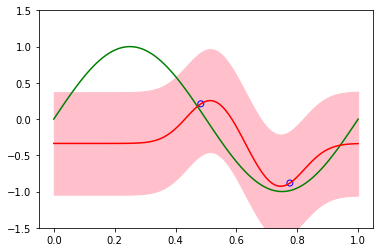

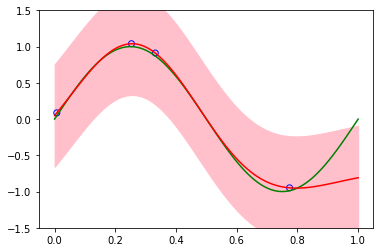

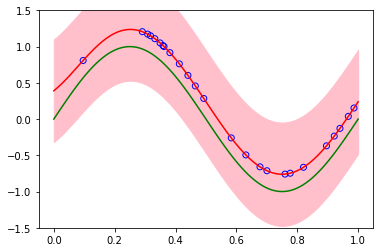

In [47]:
N=[2,4,25]
x_train=[]
y_train=[]
for i in range(3):
    x_train.append(np.random.rand(N[i]))
    y_train.append(np.sin(2*np.pi*x_train[i])+np.random.uniform(0,0.25))        
    gauss_model = make_pipeline(GaussianFeatures(9),LinearRegression())
    x_train[i]=x_train[i].reshape(-1, 1) 
    y_train[i]=y_train[i].reshape(-1, 1) 
    gauss_model.fit(x_train[i], y_train[i])
    x_test=np.linspace(0,1,100)
    x_test=x_test.reshape(-1,1)
    y= gauss_model.predict(x_test)
    plt.ylim(-1.5, 1.5)
    y_test=np.sin(2*np.pi*x_test)
    
#leaving problems in making the std
    alpha=1e-6
    beta=2
    X=x_test
    precision_prev = alpha * np.eye(np.size(X, 1))
    w_precision = precision_prev + beta * X.T @ X
    w_cov = np.linalg.inv(w_precision)
    y_var = 1/beta + np.sum(X @ w_cov * X, axis=1)
    y_std = np.sqrt(y_var)
    x_test.resize(100,)
    y_std.resize(100,)
    y.resize(100,)
    plt.fill_between(x_test,y-y_std,y+y_std,color='pink')
    plt.plot(x_test, y_test,color='g')
    plt.plot(x_test, y,color='r')
    plt.scatter(x_train[i],y_train[i],edgecolor='b',facecolor='none')    
    
    
    plt.show()

In [38]:
#figure 3.9
###############################################################